In [1]:
# AIML428 Assignment 1
# Deveremma 300602434

import pandas as pd
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
data = pd.concat([train, test])

data['Text'] = data['Title'] + " " + data['Description']
train['Text'] = train['Title'] + " " + train['Description']
test['Text'] = test['Title'] + " " + test['Description']

trainX = train['Text']
testX = test['Text']

trainY = train['Class Index']
testY = test['Class Index']

trainY -= 1
testY -= 1
data.head()

,Class Index,Title,Description,Text
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",Wall St. Bears Claw Back Into the Black (Reute...
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Carlyle Looks Toward Commercial Aerospace (Reu...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Oil and Economy Cloud Stocks' Outlook (Reuters...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Iraq Halts Oil Exports from Main Southern Pipe...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...","Oil prices soar to all-time record, posing new..."


In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def CountVectorize(feature):
    # create a count vectorizer object 
    countVect = CountVectorizer()
    countVect.fit(data[feature])

    trainCount = countVect.transform(train[feature])
    testCount = countVect.transform(test[feature])

    #print(len(countVect.get_feature_names_out()))
    #print(len(trainCount.toarray()))
    #print(len(testCount.toarray()))
    
    return countVect, trainCount, testCount

def TfidfVectorize(feature):
    # create a tfidf vectorizer object 
    tfidfVect = TfidfVectorizer()
    tfidfVect.fit(data[feature])

    trainTfidf =  tfidfVect.transform(train[feature])
    testTfidf =  tfidfVect.transform(test[feature])

    #print(len(tfidfVect.get_feature_names_out()))
    #print(len(tfidfVect.idf_))
    #print(len(trainTfidf.toarray()))
    #print(len(testTfidf.toarray()))
    
    return tfidfVect, trainTfidf, testTfidf
    

In [3]:
countVectTitle, trainTitleCount, testTitleCount = CountVectorize('Title')
countVectDesc, trainDescCount, testDescCount = CountVectorize('Description')
countVect, trainCount, testCount = CountVectorize('Text')

tfidfVectTitle, trainTitleTfidf, testTitleTfidf = TfidfVectorize('Title')
tfidfVectDesc, trainDescTfidf, testDescTfidf = TfidfVectorize('Description')
tfidfVect, trainTfidf, testTfidf = TfidfVectorize('Text')

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection, preprocessing, metrics, naive_bayes

def knn(text, trainX, testX, testY):
    KNN = KNeighborsClassifier()
    KNN.fit(trainX, trainY)
    predictions = KNN.predict(testX)

    print(f'{text}{metrics.accuracy_score(testY, predictions):.3f}')
    print(metrics.classification_report(testY, predictions, target_names=["World", "Sports", "Business", "Sci/Tech"]))

def naiveBayes(text, trainX, testX, testY):
    naiveBayes = naive_bayes.MultinomialNB()
    naiveBayes.fit(trainX, trainY)
    predictions = naiveBayes.predict(testX)

    print(f'{text}{metrics.accuracy_score(testY, predictions):.3f}')
    print(metrics.classification_report(testY, predictions, target_names=["World", "Sports", "Business", "Sci/Tech"]))


In [5]:
#knn('titleCount:', trainTitleCount, testTitleCount)
#knn('descCount:', trainDescCount, testDescCount)
knn('\tKNeighborsClassifier: textCount: ', trainCount, trainCount, trainY)   # Comment this out, it takes very long
knn('\tKNeighborsClassifier: textCount: ', trainCount, testCount, testY)


#knn('titleTfidf:', trainTitleTfidf, testTitleTfidf)
#knn('descTfidf:', trainDescTfidf, testDescTfidf)
knn('\tKNeighborsClassifier: textTfidf: ', trainTfidf, trainTfidf, trainY)   # Comment this out, it takes very long
knn('\tKNeighborsClassifier: textTfidf: ', trainTfidf, testTfidf, testY)


#naiveBayes('titleCount:', trainTitleCount, testTitleCount)
#naiveBayes('descCount:', trainDescCount, testDescCount)
naiveBayes('\tNaiveBayesClassifier: textCount: ', trainCount, trainCount, trainY)
naiveBayes('\tNaiveBayesClassifier: textCount: ', trainCount, testCount, testY)


#naiveBayes('titleTfidf:', trainTitleTfidf, testTitleTfidf)
#naiveBayes('descTfidf:', trainDescTfidf, testDescTfidf)
naiveBayes('\tNaiveBayesClassifier: textTfidf: ', trainTfidf, trainTfidf, trainY)
naiveBayes('\tNaiveBayesClassifier: textTfidf: ', trainTfidf, testTfidf, testY)

	KNeighborsClassifier: textCount: 0.792
              precision    recall  f1-score   support

       World       0.89      0.79      0.84     30000
      Sports       0.65      0.90      0.76     30000
    Business       0.83      0.76      0.80     30000
    Sci/Tech       0.89      0.71      0.79     30000

    accuracy                           0.79    120000
   macro avg       0.81      0.79      0.79    120000
weighted avg       0.81      0.79      0.79    120000

	KNeighborsClassifier: textCount: 0.694
              precision    recall  f1-score   support

       World       0.81      0.69      0.75      1900
      Sports       0.56      0.82      0.66      1900
    Business       0.72      0.66      0.69      1900
    Sci/Tech       0.79      0.60      0.68      1900

    accuracy                           0.69      7600
   macro avg       0.72      0.69      0.70      7600
weighted avg       0.72      0.69      0.70      7600

	KNeighborsClassifier: textTfidf: 0.931
          

In [6]:
import numpy
# word to integer IDs, documents padded to the same length
from tensorflow.keras.preprocessing import text, sequence

# create a tokenizer 
token = text.Tokenizer()
token.fit_on_texts(data['Text'])  
word_index = token.word_index

# convert text to sequence of tokens and pad them to ensure equal length vectors 
train_seq_x = sequence.pad_sequences(token.texts_to_sequences(trainX), maxlen=70)
test_seq_x = sequence.pad_sequences(token.texts_to_sequences(testX), maxlen=70)
train_seq_x[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,   443,   440,  1697, 15011,   108,    64,     1,
         852,    21,    21,   739,  8198,   443,  6336, 10243,  2965,
           4,  5937, 26693,    40,  4013,   800,   335])

In [7]:
# CNN parameters from https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/basic_text_classification.ipynb

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
#not use any pre-trained embedding
from keras.models import Sequential
from keras import layers
import seaborn as sns

vocab_size = len(word_index)+1

model1 = Sequential()
model1.add(layers.Embedding(input_dim=vocab_size, output_dim=50))
model1.build((None, 70)) # build the Embedding to inilizices the weight
model1.add(layers.Conv1D(filters=128, kernel_size=5, activation='relu'))
model1.add(layers.GlobalAveragePooling1D())
model1.add(layers.Dense(16, activation='relu'))
model1.add(layers.Dense(4, activation='softmax'))

#model1.summary()
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model1.fit(train_seq_x, trainY, epochs=10, batch_size=512, validation_data=(test_seq_x, testY), verbose=1)

results = model1.evaluate(test_seq_x, testY)
print(f'\n[val_loss, val_accuracy]\n{results}')

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - acc: 0.6368 - loss: 0.9156 - val_acc: 0.9070 - val_loss: 0.2947
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - acc: 0.9245 - loss: 0.2367 - val_acc: 0.9162 - val_loss: 0.2615
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - acc: 0.9462 - loss: 0.1688 - val_acc: 0.9153 - val_loss: 0.2557
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - acc: 0.9603 - loss: 0.1260 - val_acc: 0.9116 - val_loss: 0.2625
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - acc: 0.9686 - loss: 0.0994 - val_acc: 0.9101 - val_loss: 0.2842
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - acc: 0.9750 - loss: 0.0791 - val_acc: 0.9080 - val_loss: 0.3139
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - acc: 0.9792 - loss: 0.0650 - val_acc: 0.9091 - val_loss: 0.3300
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - acc: 0.9825 - loss: 0.0568 - val_acc: 0.9042 - val_loss: 0.3597
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


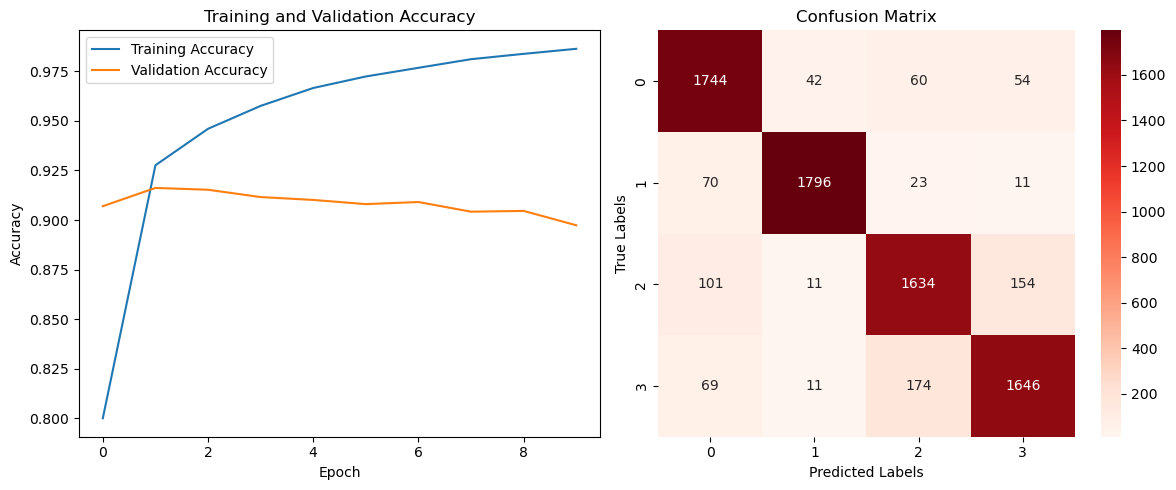

In [8]:
def plotResults(model, colour):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot accuracy on the first subplot
    axes[0].plot(history.history.get('accuracy', history.history.get('acc')), label='Training Accuracy')
    axes[0].plot(history.history.get('val_accuracy', history.history.get('val_acc')), label='Validation Accuracy')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Accuracy')
    axes[0].legend()
    axes[0].set_title('Training and Validation Accuracy')
    
    # Generate confusion matrix
    predictions = model.predict(test_seq_x)
    # Convert probabilities to class labels
    predicted_classes = numpy.argmax(predictions, axis=1)  
    cm = confusion_matrix(testY, predicted_classes)
    
    # Plot confusion matrix on the second subplot
    sns.heatmap(cm, annot=True, fmt='d', cmap=colour, xticklabels=numpy.arange(4), yticklabels=numpy.arange(4), ax=axes[1])
    axes[1].set_title('Confusion Matrix')
    axes[1].set_xlabel('Predicted Labels')
    axes[1].set_ylabel('True Labels')
    
    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

plotResults(model1, 'Reds')

In [9]:
# https://realpython.com/python-keras-text-classification/
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = numpy.zeros((vocab_size, embedding_dim))

    with open(filepath, encoding="utf-8") as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = numpy.array(
                    vector, dtype=numpy.float32)[:embedding_dim]

    print('Embedding Matrix Complete')
    return embedding_matrix

Embedding Matrix Complete
0.8062947941552309
Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - acc: 0.8067 - loss: 0.6187 - val_acc: 0.8995 - val_loss: 0.3003
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - acc: 0.9145 - loss: 0.2618 - val_acc: 0.9107 - val_loss: 0.2725
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - acc: 0.9309 - loss: 0.2090 - val_acc: 0.9141 - val_loss: 0.2527
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - acc: 0.9414 - loss: 0.1755 - val_acc: 0.9159 - val_loss: 0.2434
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - acc: 0.9512 - loss: 0.1482 - val_acc: 0.9193 - val_loss: 0.2452
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - acc: 0.9595 - loss: 0.1229 - val_acc: 0.9157 - val_loss: 0.2590
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - acc: 0.9662 - loss: 0.1023 - val_acc: 0.9145 - val_loss: 0.2747
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - acc: 0.9708 - loss: 0.0888 - val_acc: 0.9143 - val_loss: 0.

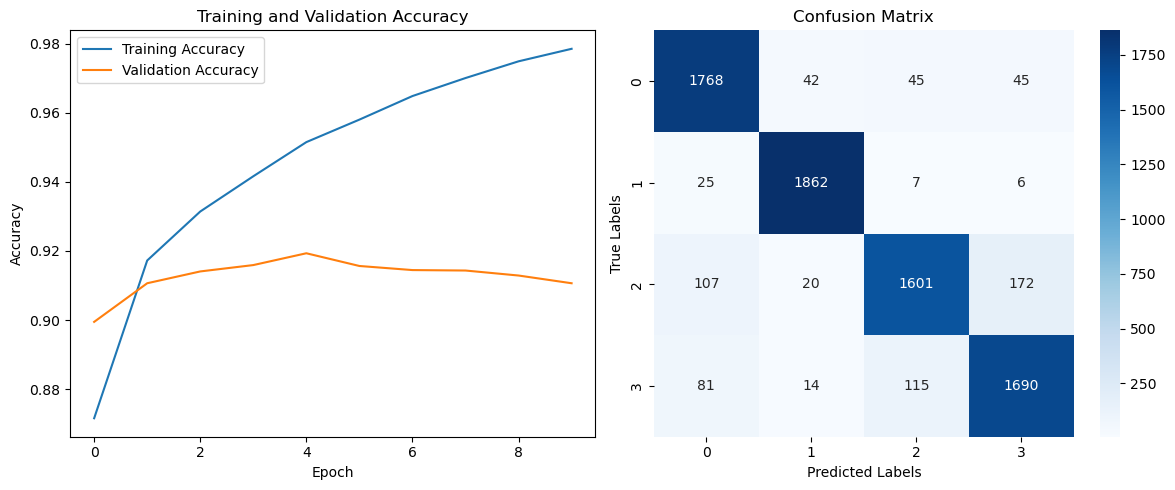

In [10]:
dimensions = 100
embedding_matrix = create_embedding_matrix(f'glove.6B.{dimensions}d.txt', token.word_index, dimensions)
print(numpy.count_nonzero(numpy.count_nonzero(embedding_matrix, axis=1)) / vocab_size)

# Build CNN model with pre-trained embeddings
model2 = Sequential()
model2.add(layers.Embedding(vocab_size, dimensions, weights=[embedding_matrix], trainable=True))
model2.add(layers.Conv1D(filters=128, kernel_size=5, activation='relu'))
model2.add(layers.GlobalAveragePooling1D())
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(4, activation='softmax'))

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model2.fit(train_seq_x, trainY, epochs=10, batch_size=512, validation_data=(test_seq_x, testY), verbose=1)

results = model2.evaluate(test_seq_x, testY)
print(f'\n[val_loss, val_accuracy]\n{results}')
plotResults(model2, 'Blues')

In [11]:
import re
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

#Data Preprocessing
data['Text'] = data['Text'].str.lower()
train['Text'] = train['Text'].str.lower()
test['Text'] = test['Text'].str.lower()

# Remove all Punctuation
data['Text'] = data['Text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))
train['Text'] = train['Text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))
test['Text'] = test['Text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))

# Remove words and digits containing digits
data['Text'] = data['Text'].apply(lambda x: re.sub('W*dw*','',x))
train['Text'] = train['Text'].apply(lambda x: re.sub('W*dw*','',x))
test['Text'] = test['Text'].apply(lambda x: re.sub('W*dw*','',x))

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word.lower() not in set(ENGLISH_STOP_WORDS)])

# Remove common stopwords
data['Text'] = data['Text'].apply(remove_stopwords)
train['Text'] = train['Text'].apply(remove_stopwords)
test['Text'] = test['Text'].apply(remove_stopwords)

trainX = train['Text']
testX = test['Text']

# create a tokenizer 
token = text.Tokenizer()
token.fit_on_texts(data['Text'])  
word_index = token.word_index
vocab_size = len(word_index)+1

# convert text to sequence of tokens and pad them to ensure equal length vectors 
train_seq_x = sequence.pad_sequences(token.texts_to_sequences(trainX), maxlen=100)
test_seq_x = sequence.pad_sequences(token.texts_to_sequences(testX), maxlen=100)
train_seq_x[0]

dimensions = 50
embedding_matrix = create_embedding_matrix(f'glove.6B.{dimensions}d.txt', token.word_index, dimensions)
print(numpy.count_nonzero(numpy.count_nonzero(embedding_matrix, axis=1)) / vocab_size)

Embedding Matrix Complete
0.44719531624165537


Epoch 1/6
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 45s 18ms/step - acc: 0.7652 - loss: 0.7264 - val_acc: 0.9041 - val_loss: 0.3666
Epoch 2/6
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 46s 18ms/step - acc: 0.8948 - loss: 0.4096 - val_acc: 0.9145 - val_loss: 0.3212
Epoch 3/6
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 45s 18ms/step - acc: 0.9107 - loss: 0.3474 - val_acc: 0.9188 - val_loss: 0.3071
Epoch 4/6
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 44s 17ms/step - acc: 0.9206 - loss: 0.3061 - val_acc: 0.9195 - val_loss: 0.3062
Epoch 5/6
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 44s 18ms/step - acc: 0.9313 - loss: 0.2750 - val_acc: 0.9221 - val_loss: 0.2942
Epoch 6/6
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 45s 18ms/step - acc: 0.9392 - loss: 0.2450 - val_acc: 0.9258 - val_loss: 0.2955
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.9228 - loss: 0.3109 

[val_loss, val_accuracy]
[0.2954857051372528, 0.925789475440979]
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


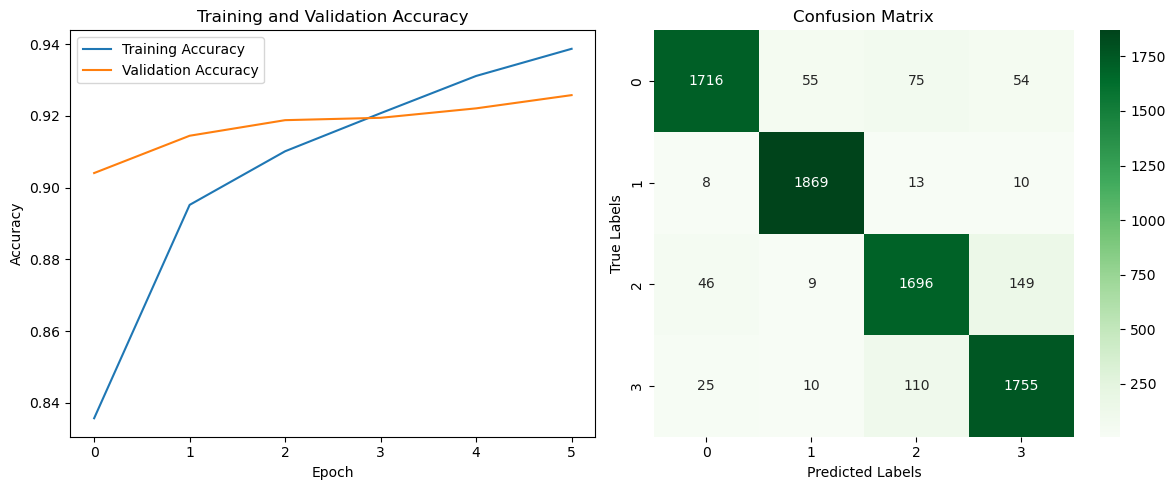

In [13]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop 
from tensorflow.keras.regularizers import l2

# Fine-Tuned CNN Model
model3 = Sequential()
model3.add(layers.Embedding(vocab_size, dimensions, weights=[embedding_matrix], trainable=True))
model3.add(layers.Conv1D(filters=256, kernel_size=3, activation='relu', kernel_regularizer=l2(0.001)))
model3.add(layers.GlobalMaxPooling1D())
model3.add(layers.Dense(24, activation='relu', kernel_regularizer=l2(0.001)))
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(4, activation='softmax'))

model3.compile(optimizer=Adam(learning_rate=0.0005), loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model3.fit(train_seq_x, trainY, epochs=6, batch_size=48, validation_data=(test_seq_x, testY), verbose=1)

results = model3.evaluate(test_seq_x, testY)
print(f'\n[val_loss, val_accuracy]\n{results}')
plotResults(model3, 'Greens')